In [12]:
import matplotlib
from pylab import *
import networkx as nx

def initialize():
    global g, nextg
    g = nx.karate_club_graph()
    for i, j in g.edges:
        g.edges[i,j]['weight'] = 0.5
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if g.nodes[i]['club'] == 'Mr. Hi' else 0
    nextg = g.copy()
    nextg.pos = g.pos = nx.spring_layout(g)

def observe():
    global g, nextg
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            edge_cmap = cm.binary, edge_vmin = 0, edge_vmax = 1,
            edge_color = [g.edges[i,j]['weight'] for i, j in g.edges],
            pos = g.pos)

alpha = 1 # diffusion constant
beta = 3 # rate of adaptive edge weight change
gamma = 3 # pickiness of nodes
Dt = 0.01 # Delta t

def update():
    global g, nextg
    for i in g.nodes:
        ci = g.nodes[i]['state']
        nextg.nodes[i]['state'] = ci + alpha * ( \
            sum((g.nodes[j]['state'] - ci) * g.edges[i,j]['weight']
                for j in g.neighbors(i))) * Dt
    for i, j in g.edges:
        wij = g.edges[i,j]['weight']
        nextg.edges[i,j]['weight'] = wij + beta * wij * (1 - wij) * ( \
            1 - gamma * abs(g.nodes[i]['state'] - g.nodes[j]['state'])
            ) * Dt
    nextg.pos = nx.spring_layout(nextg, pos = g.pos, iterations = 5)
    g, nextg = nextg, g

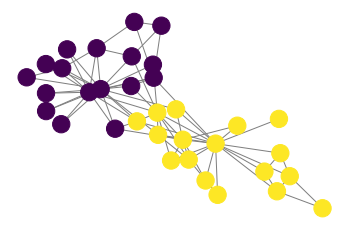

In [13]:
initialize()
observe()

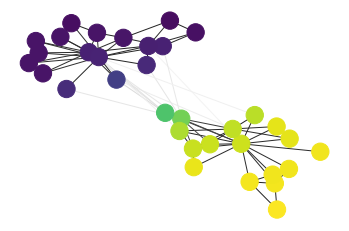

In [18]:
for i in range(20):
    observe()
    shpw